In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from model import PCA as MyPCA
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from data.datasets import DiabetesDataset

In [3]:
RANDOM_STATE = 42
THRESHOLD = 0.95

In [4]:
def plot_pca_analysis(pca, X: np.ndarray, y: np.ndarray = None, title: str = "PCA Analysis"):
    plt.figure(figsize=(6,4))
    cv = np.cumsum(pca.explained_variance_ratio_)
    plt.plot(range(1, len(cv) + 1), cv, 'o-')
    plt.xlabel("Number of components")
    plt.ylabel("Cumulative explained variance")
    plt.grid(True)
    plt.title(f"{title} - Explained Variance")
    plt.show()

    X_reduced = pca.transform(X)
    if X_reduced.shape[1] >= 2:
        plt.figure(figsize=(6,5))
        scatter = plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y, cmap='viridis', alpha=0.7)
        plt.xlabel("PC1")
        plt.ylabel("PC2")
        plt.title(f"{title} - First 2 Principal Components")
        if y is not None: plt.colorbar(scatter, label="target")
        plt.grid(True)
        plt.show()

def print_in_row(arr): print(" ".join("{:6.2f}".format(v) for v in arr))

def print_comparison(obj, my, sk):
    print("Совпадение проекций по абсолютным значениям: ", np.allclose(np.abs(my), np.abs(sk), atol=1e-6))
    print("Оригинал:")
    print_in_row(obj)
    print("Самописная PCA:")
    print_in_row(my)
    print("Sklearn PCA:")
    print_in_row(sk)

In [5]:
dataset = DiabetesDataset()
X = dataset.X
y = dataset.y

Cumulative explained variance:
  0.40   0.55   0.67   0.77   0.83   0.89   0.95   0.99
Сomponents shape: (8, 10)


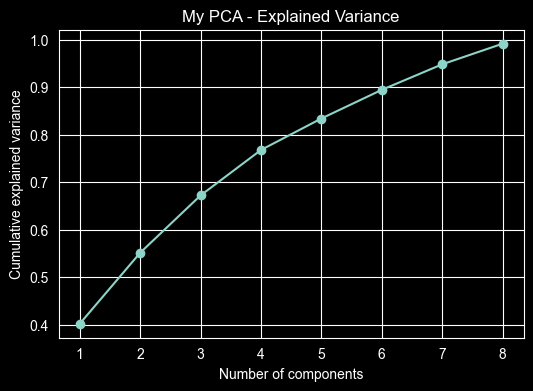

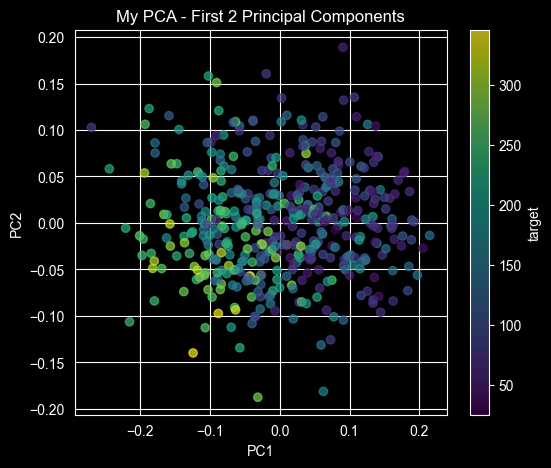

In [6]:
my_pca = MyPCA()
my_pca.fit(X)
print("Cumulative explained variance:")
print_in_row(np.cumsum(my_pca.explained_variance_ratio_))
print("Сomponents shape:", my_pca.components_.shape)
plot_pca_analysis(my_pca, X, y, title="My PCA")

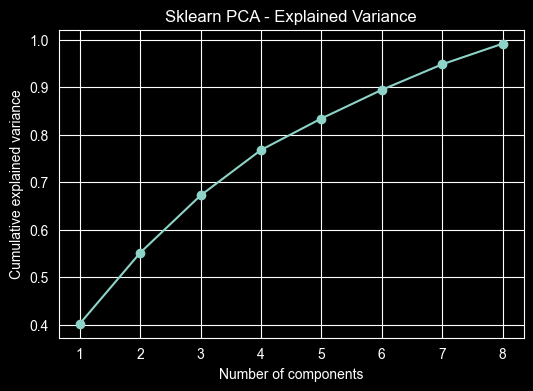

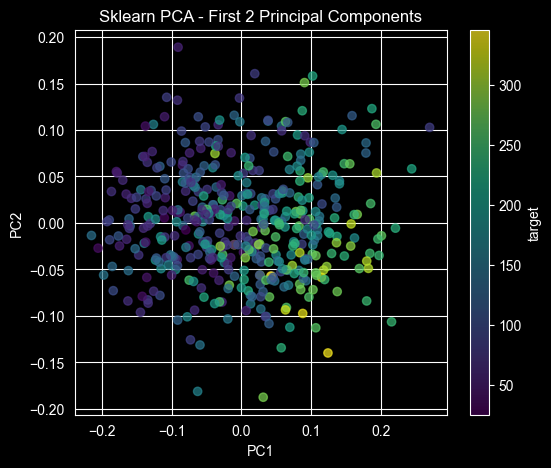

In [7]:
sk_pca = PCA(n_components=THRESHOLD, random_state=RANDOM_STATE)
sk_pca.fit(X)
plot_pca_analysis(sk_pca, X, y, title="Sklearn PCA")

In [8]:
x_obj = X[0].reshape(1, -1)
x_my = my_pca.transform(x_obj)
x_sk = sk_pca.transform(x_obj)

In [9]:
print('Для первого объекта');print_comparison(x_obj[0], x_my[0], x_sk[0])

Для первого объекта
Совпадение проекций по абсолютным значениям:  True
Оригинал:
  0.04   0.05   0.06   0.02  -0.04  -0.03  -0.04  -0.00   0.02  -0.02
Самописная PCA:
 -0.03  -0.09   0.03  -0.00  -0.01   0.05  -0.01  -0.04
Sklearn PCA:
  0.03  -0.09   0.03   0.00   0.01  -0.05  -0.01  -0.04
